In [4]:
import pandas as pd
df = pd.read_csv('stock/df_naver_add.csv',index_col=0, header=0)
len(df.columns)

24

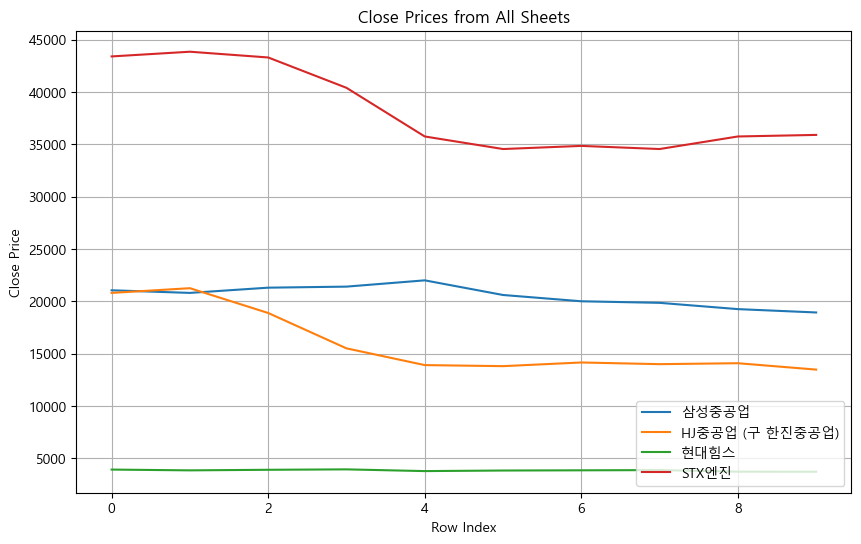

In [15]:
from openpyxl import load_workbook
import matplotlib.pyplot as plt

wb = load_workbook(filename='ship_stock_prices.xlsx')

plt.figure(figsize=(10, 6))

name_map = {
    '042660': '한화오션 (구 대우조선해양)',
    '009540': 'HD한국조선해양',
    '010140': '삼성중공업',
    '010620': '현대미포조선',
    '329180': '현대중공업',
    '097230': 'HJ중공업 (구 한진중공업)',
    '238490': '현대힘스',
    '077970': 'STX엔진',
    '267250': 'HD현대마린엔진',
}

legend_list = []
for sheet_name in wb.sheetnames:
    # 아래 sheet_name중 주석 처리 안된 것만 plot
    if sheet_name not in [
    #'042660',  # 한화오션 (구 대우조선해양)
    #'009540',  # HD한국조선해양
    '010140',  # 삼성중공업
    #'010620',  # 현대미포조선
    #'329180',  # 현대중공업
    '097230',  # HJ중공업 (구 한진중공업)
    '238490',  # 현대힘스
    '077970',  # STX엔진
    #'267250',  # HD현대마린엔진
    ] :
        continue

    ws = wb[sheet_name]

    headers = [cell.value for cell in ws[1]]

    closes = []
    close_idx = headers.index("Close")
    for row in ws.iter_rows(min_row=2, values_only=True):
        closes.append(row[close_idx])
    
    plt.plot(closes, label=sheet_name)
    legend_list.append(name_map[sheet_name])

plt.rc('font', family='Malgun Gothic')
plt.title("Close Prices from All Sheets")
plt.xlabel("Row Index")
plt.ylabel("Close Price")
plt.legend(legend_list, loc='lower right')
plt.grid(True)
plt.show()